In [5]:
# QUESTO FILE ANALIZZA IN MODO PIù GENERALE GLI ORDINI CON VOLUMI ALTI CON TIMEFRAME MAGGIORI UGUALI A 15 MINUTI
# L'ANALISI NON HA PORTATO AD UN RISULTATO SODDISFACENTE


from Functions import total_function_multiprocessing
from Helpers import create_event_keys
from time import sleep
import json

# if True, the analysis starts from the current event-keys used in production
# else, it starts an analysis based on the keys in "event_keys" folder
KEEP_PRODUCTION_ANALYSIS = True

if not KEEP_PRODUCTION_ANALYSIS:
    analysis_name = '2023-2024-analysis-10-250-higherfrequency'
    list_minutes = '1440'
    event_keys_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/event_keys/event_keys.json"
    event_keys = create_event_keys(event_keys_path, list_minutes, analysis_name)
else:
    riskmanagement_json_prod_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/riskmanagement.json"
    with open(riskmanagement_json_prod_path, 'r') as file:
        # Retrieve shared memory for JSON data and "start_interval"
        riskmanagement_json_prod = json.load(file)
        event_keys = list(riskmanagement_json_prod.keys())

n_processes = 8
analysis_timeframe=7

UNLOCK = True
n_iterations = 10

for i in range(n_iterations):
    if UNLOCK:
        shared_data = total_function_multiprocessing(event_keys, analysis_timeframe, n_processes, KEEP_PRODUCTION_ANALYSIS) 
        iterazione = i+1
    msg=f'{iterazione}/{n_iterations} COMPLETED'
    print(msg)

    print('sleeping')
    sleep(5)

svolume standings is up to date, loading then..
total_combinations :  23
Loading analysis_json in /Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/analysis.json
start_interval at 2025-02-19T06:55:03.762479
end_interval at 2025-02-21 08:48:54.773945
/Users/albertorainieri/Personal/analysis/Analysis2024/benchmark_json/benchmark-20-2-2025 exists. Loading the file...


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/PortableSSD/Alberto/Trading/Json/json_tracker/'

In [ ]:
#DOWNLOAD AND SHOW OUTPUT FROM TOTAL MULTIPROCESSING

import sys
sys.path.insert(0,'..')
from Functions import download_show_output
from Helpers import filter_complete_info_by_current_eventkeys
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', None)

minimum_event_number = 1
minimum_event_number_list = [minimum_event_number]
mean_threshold = -10
frequency_threshold = 0
std_multiplier = 10
early_validation = False
# file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-sell-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-sell-10-250-highfrequency.json"]

file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/analysis.json"]
start_analysis= datetime(2025,1,1)
early_validation = datetime(2026,1,1)
xth_percentile=100
filter_field='mean' #mean, std, max, min
output, complete_info = download_show_output(minimum_event_number=minimum_event_number,mean_threshold=mean_threshold, frequency_threshold=frequency_threshold,
                                              early_validation=early_validation, std_multiplier=std_multiplier, file_paths=file_paths,
                                                start_analysis=start_analysis, DELETE_99_PERCENTILE=True, filter_field=filter_field, xth_percentile=xth_percentile)


output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)

df = pd.DataFrame(output).transpose()
n_event_keys = len(df['mean'])
print(f'Number of event_keys: {n_event_keys}')
daily_frequency_all_events = int(sum(df['frequency/month']) / 30)
print(f'Daily frequency of events: {daily_frequency_all_events}')

df.sort_values(by=['mean'], ascending=False)

#df.sort_values(by=['lower_bound'], ascending=False)

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Filtered 17 event_keys
Number of event_keys: 23
Daily frequency of events: 2


,mean,std,max,min,median_max,median_min,standings,n_coins,n_events,upper_bound,lower_bound,frequency/month
buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl:250,1.88,4.68,8.67,-5.43,3.68,-2.18,188.07,24.0,30.0,6.56,-2.80,2.47
buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250,1.56,3.59,8.08,-4.60,5.20,-1.87,193.96,20.0,24.0,5.15,-2.03,1.97
buy_vol_15m:0.25/vol_15m:2/timeframe:1440/lvl:10,0.34,1.97,3.75,-3.98,3.28,-1.71,6.54,8.0,26.0,2.31,-1.63,2.14
buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150,0.23,3.60,6.35,-5.81,4.02,-3.33,102.34,35.0,59.0,3.83,-3.37,4.85
buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50,0.12,3.10,5.27,-5.67,3.99,-3.23,27.50,25.0,48.0,3.22,-2.98,3.95
buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150,0.06,4.50,6.56,-7.45,3.58,-4.33,103.19,45.0,73.0,4.56,-4.44,6.00
buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50,-0.11,3.08,4.56,-5.39,3.44,-4.23,38.19,12.0,21.0,2.97,-3.19,1.73
buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250,-0.23,3.53,6.09,-5.89,4.20,-3.15,182.68,29.0,38.0,3.30,-3.76,3.12
buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150,-0.25,3.86,5.93,-6.80,3.72,-4.24,98.16,35.0,58.0,3.61,-4.11,4.77
buy_vol_1m:0.15/vol_1m:10/timeframe:1440/lvl:10,-0.30,2.10,3.23,-4.50,3.00,-2.66,6.27,8.0,37.0,1.80,-2.40,3.04


In [ ]:
complete_info['buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150'].keys()

dict_keys(['info', 'n_coins', 'events', 'frequency/month'])

In [ ]:
# from Helpers import filter_complete_info_by_current_eventkeys
# output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)


In [ ]:
# from Helpers import create_rismanagement_from_complete_info
# create_rismanagement_from_complete_info(complete_info)

In [ ]:
from Helpers import frequency_events_analysis
frequency_events_analysis(complete_info)


In [ ]:
from Analysis2023.Functions import check_investment_amount
check_investment_amount(complete_info, output, investment_amount=150)

In [2]:
from Helpers import get_timeseries
from Helpers import get_analysis


output, complete_info = get_analysis()
event_keys_filter = []
check_past=180 #minutes before event trigger
check_future=180 #minutes after the end of event (usually after 1 days from event trigger)
jump=0.04 #jump from price levels in terms of cumulative volume order (from 0 to 1)
limit=0.25 #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
price_change_jump = 0.025 #range of price change (used in get_price_levels for bid/ask_order_distribution)
max_limit = 0.2 #what is the max change, beyond that I won't consider triggers ---> ( max_price - initial_price ) / initial_price
price_drop_limit = 0.05  #current drop from max. The minimum drop from the maximum for triggering events ---> abs( (current_price - max_price) / max_price )
distance_jump_to_current_price = 0.01 # minimum distance from jump
max_ask_order_distribution_level = 0.1 # max percentage of ask volume at the first level (level is based on price_change_jump)
last_i_ask_order_distribution= 1 # how many last order distribution obs I consider, an np.mean is executed
min_n_obs_jump_level=5
save_plot=True
analyze=True
#event_keys_filter = ['buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50', 'buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150']
get_timeseries(complete_info, check_past=check_past, check_future=check_future, jump=jump, limit=limit, event_keys_filter = event_keys_filter,
                   price_change_jump = price_change_jump, max_limit = max_limit, price_drop_limit = price_drop_limit,
                     distance_jump_to_current_price = distance_jump_to_current_price, max_ask_order_distribution_level = max_ask_order_distribution_level,
                       last_i_ask_order_distribution= last_i_ask_order_distribution, min_n_obs_jump_level=min_n_obs_jump_level, save_plot=save_plot, analyze=analyze)


Filtered 0 event_keys
Number of event_keys: 23
Daily frequency of events: 1



#####################################################################
1/23 Event Key: buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#####################################################################
2/23 Event Key: buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#####################################################################
3/23 Event Key: buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#############################

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, cur

Event Key: buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150
Event Key: buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250
Event Key: buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250
Event Key: buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150
Event Key: buy_vol_5m:0.8/vol_5m:10/timeframe:1440/lvl:50
Event Key: buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150
Event Key: buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50
Event Key: buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150
Event Key: buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50
Event Key: buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50
Event Key: buy_vol_5m:0.8/vol_5m:50/timeframe:1440/lvl:250
Event Key: buy_vol_1m:0.85/vol_1m:100/timeframe:1440/lvl:250
Event Key: buy_vol_1m:0.15/vol_1m:10/timeframe:1440/lvl:10
Event Key: buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150
Event Key: buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50
Event Key: buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150
Event Key: buy_vol_15m:0.25/vol_15m:2/timeframe

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



##################### STRATEGY INFO #####################
strategy_jump=0.04_
limit=0.25_
price_change_jump=0.025_
max_limit=0.2_
price_drop_limit=0.05_
distance_jump_to_current_price=0.01_
max_ask_order_distribution_level=0.1_
last_i_ask_order_distribution=1_
min_n_obs_jump_level=5
##################### STRATEGY INFO #####################

Filtered 0 event_keys
Number of event_keys: 23
Daily frequency of events: 1


/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


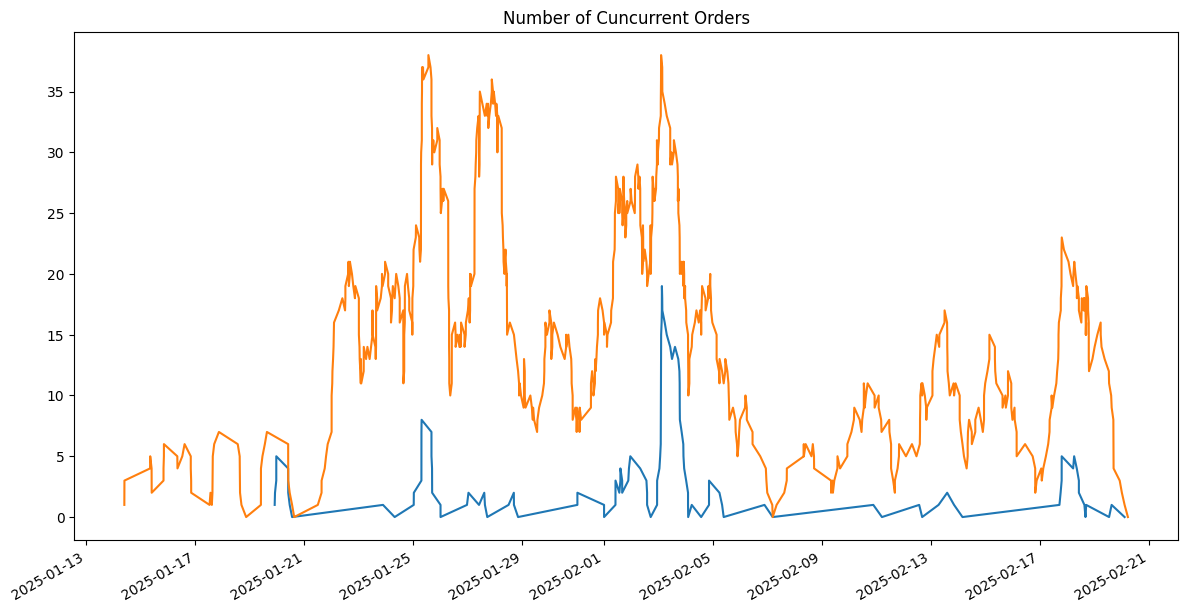

svolume standings is up to date, loading then..


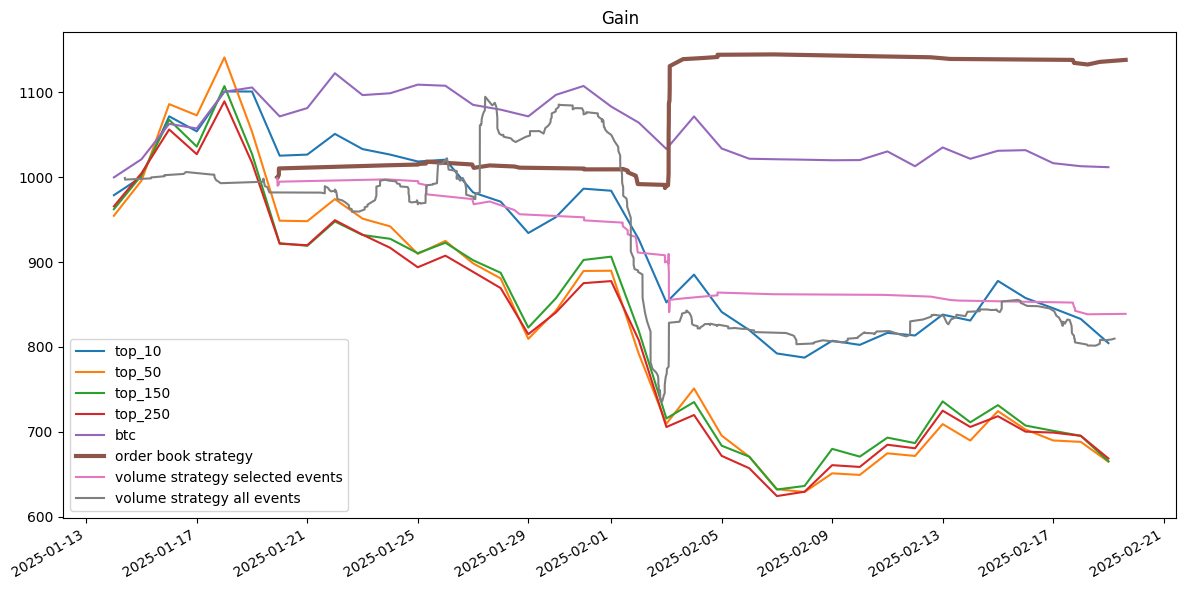

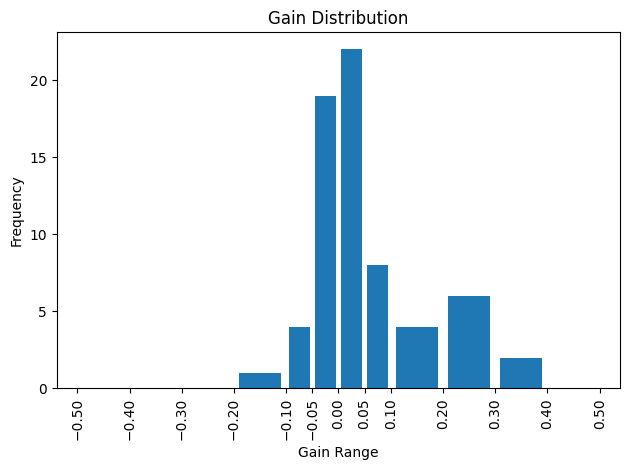

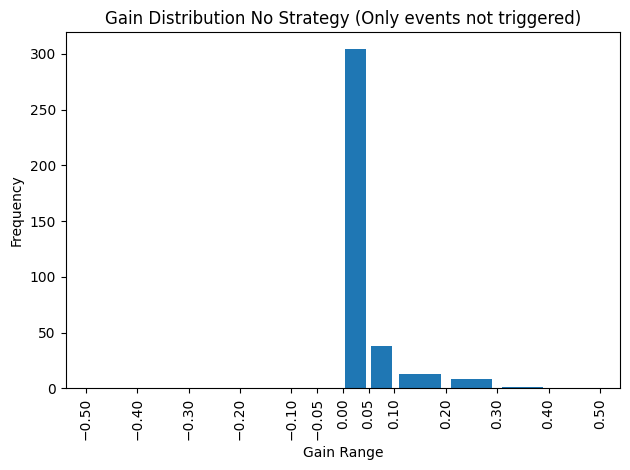

Initial Investment: 1000 euro
Invesment per event: 52.63 euro
Commission: 4.95 euro
Total Investment 3473.68
Average Profit per event: 4.13%
Profit: 138.4 euro
Total Observations Under Analysis: 430
Total Events triggered by strategy: 66
430


,event_keys,n_events,gain,max,min,2025-01,2025-02
21,buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50,4,14.03,2.26,-18.38,0.81 vs -4.2 / max:0.14 / min:-5.77 / n:1,18.44 vs -5.82 / max:2.96 / min:-22.58 / n:3
13,buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl...,2,12.09,10.34,-8.61,-1.7 vs -6.66 / max:0.0 / min:-7.87 / n:1,25.87 vs 14.47 / max:20.67 / min:-9.35 / n:1
3,buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50,5,10.23,6.15,-9.75,3.34 vs 1.28 / max:3.77 / min:-9.27 / n:2,14.82 vs 6.04 / max:7.73 / min:-10.07 / n:3
9,buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50,2,7.73,0.27,-20.12,1.04 vs -3.8 / max:0.39 / min:-5.55 / n:1,14.43 vs -19.46 / max:0.14 / min:-34.7 / n:1
2,buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150,1,7.06,4.07,-4.75,7.06 vs 2.91 / max:4.07 / min:-4.75 / n:1,None
18,buy_vol_1m:0.15/vol_1m:20/timeframe:1440/lvl:50,8,6.50,3.38,-15.74,-7.47 vs -11.46 / max:1.16 / min:-13.51 / n:1,8.49 vs -1.11 / max:3.69 / min:-16.06 / n:7
15,buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150,4,5.41,7.99,-25.68,None,5.41 vs -16.66 / max:7.99 / min:-25.68 / n:4
20,buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50,3,5.21,4.81,-12.95,1.06 vs -3.95 / max:0.27 / min:-5.71 / n:1,7.29 vs -5.23 / max:7.08 / min:-16.57 / n:2
16,buy_vol_1m:0.85/vol_1m:10/timeframe:1440/lvl:10,3,3.84,0.84,-14.27,-2.6 vs -6.63 / max:1.26 / min:-8.89 / n:2,16.7 vs -5.92 / max:0.0 / min:-25.04 / n:1
11,buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150,4,3.83,4.13,-8.34,2.67 vs -0.87 / max:4.27 / min:-6.95 / n:3,7.32 vs 3.08 / max:3.71 / min:-12.52 / n:1


In [1]:
from Helpers import plot_strategy_result
df_events_overview, df_event_keys_overview = plot_strategy_result()

df_event_keys_overview.sort_values(by=['gain'], ascending=False)

In [2]:
df_events_overview

,Timestamp Buy,Timestamp Sell,Coin,Profit,Investment,Profit_vol_strat,max,min,Initial Price,Buy Price,Sell price
0,2025-01-19T21:55:00,2025-01-20T13:15:00,ONEUSDT,-0.09,999.877632,-2.169290,7.83,-10.89,0.023510,0.023020,0.023000
1,2025-01-19T22:12:00,2025-01-20T11:08:00,JUPUSDT,-0.76,999.402632,-16.516215,1.14,-25.45,1.196400,1.006400,0.998800
2,2025-01-19T23:19:00,2025-01-20T09:47:00,WBTCUSDT,7.03,1003.027632,3.313656,4.48,-4.40,104241.970000,100618.050000,107696.190000
3,2025-01-19T23:19:00,2025-01-20T09:47:00,WBTCUSDT,7.30,1006.794737,3.321327,4.57,-4.44,104234.230000,100367.960000,107696.190000
4,2025-01-19T23:20:00,2025-01-20T09:50:00,WBTCUSDT,7.06,1010.435526,2.909273,4.07,-4.75,104506.510000,100456.300000,107546.890000
5,2025-01-23T21:19:00,2025-01-24T07:35:00,BNSOLUSDT,7.17,1014.134211,5.368339,6.54,-2.39,255.200000,250.900000,268.900000
6,2025-01-25T00:22:00,2025-01-25T23:59:00,GUSDT,1.85,1015.032895,-4.041096,0.00,-6.54,0.029200,0.027510,0.028020
7,2025-01-25T00:28:00,2025-01-25T23:58:00,GUSDT,1.49,1015.742105,-4.607509,0.00,-6.93,0.029300,0.027540,0.027950
8,2025-01-25T07:08:00,2025-01-25T15:59:00,NEARUSDT,1.04,1016.214474,-3.746118,0.43,-5.55,5.152000,4.908000,4.959000
9,2025-01-25T07:08:00,2025-01-25T15:59:00,NEARUSDT,1.08,1016.707895,-3.746118,0.49,-5.55,5.152000,4.906000,4.959000


/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



##################### STRATEGY INFO #####################
strategy_jump=0.04_
limit=0.25_
price_change_jump=0.025_
max_limit=0.2_
price_drop_limit=0.05_
distance_jump_to_current_price=0.01_
max_ask_order_distribution_level=0.1_
last_i_ask_order_distribution=1_
min_n_obs_jump_level=5
##################### STRATEGY INFO #####################

Initial Price: 102980.13 - Final Price: 105484.3
Max Price: 106677.11666700001 - Min Price: 103639.202832
Initial Price: 95064.68 - Final Price: 95483.57
Max Price: 96595.22134799999 - Min Price: 96718.805432
Initial Price: 12.56 - Final Price: 13.36
Max Price: 13.660255999999999 - Min Price: 12.709464
Initial Price: 4.8751 - Final Price: 4.7033
Max Price: 4.98673979 - Min Price: 5.36114747
Initial Price: 0.048 - Final Price: 0.04665
Max Price: 0.06264 - Min Price: 0.0510096
Initial Price: 0.3716 - Final Price: 0.3828
Max Price: 0.38490328 - Min Price: 0.37230604
Initial Price: 0.02549 - Final Price: 0.02641
Max Price: 0.027350769999999996 - Min Pr

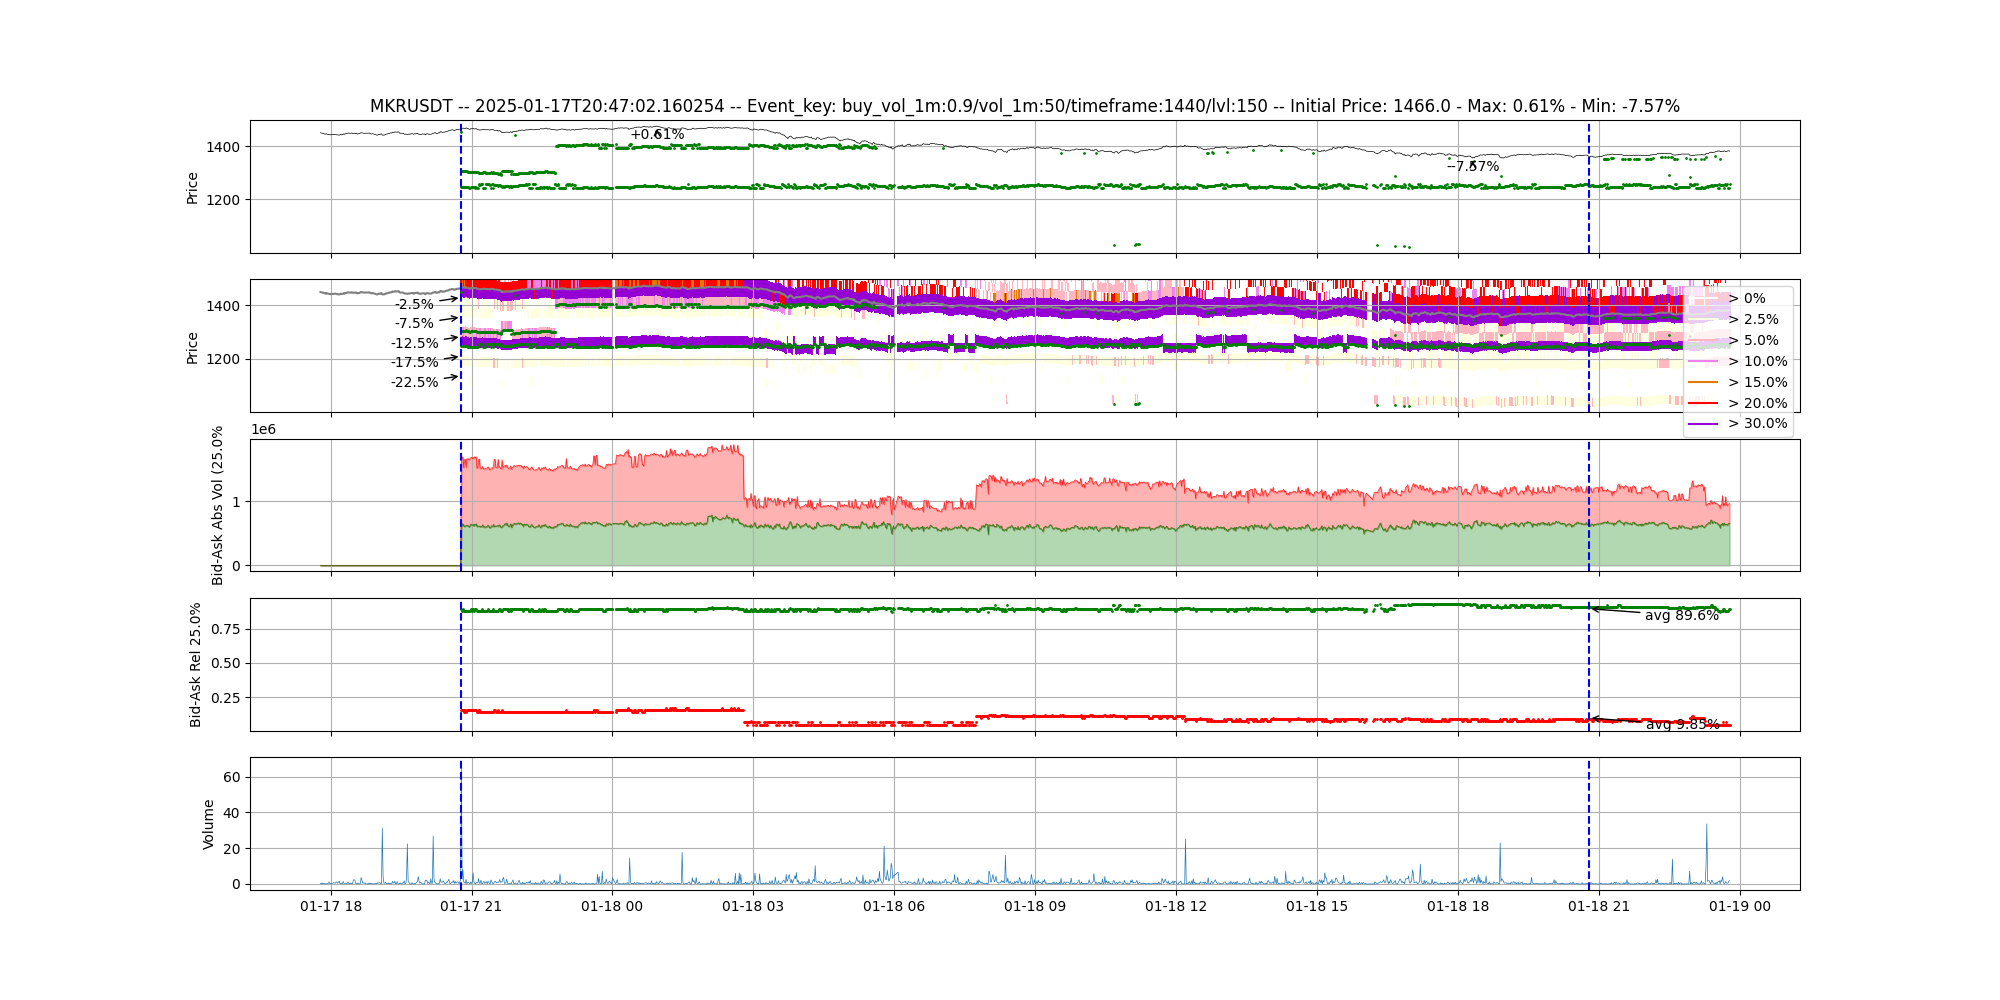

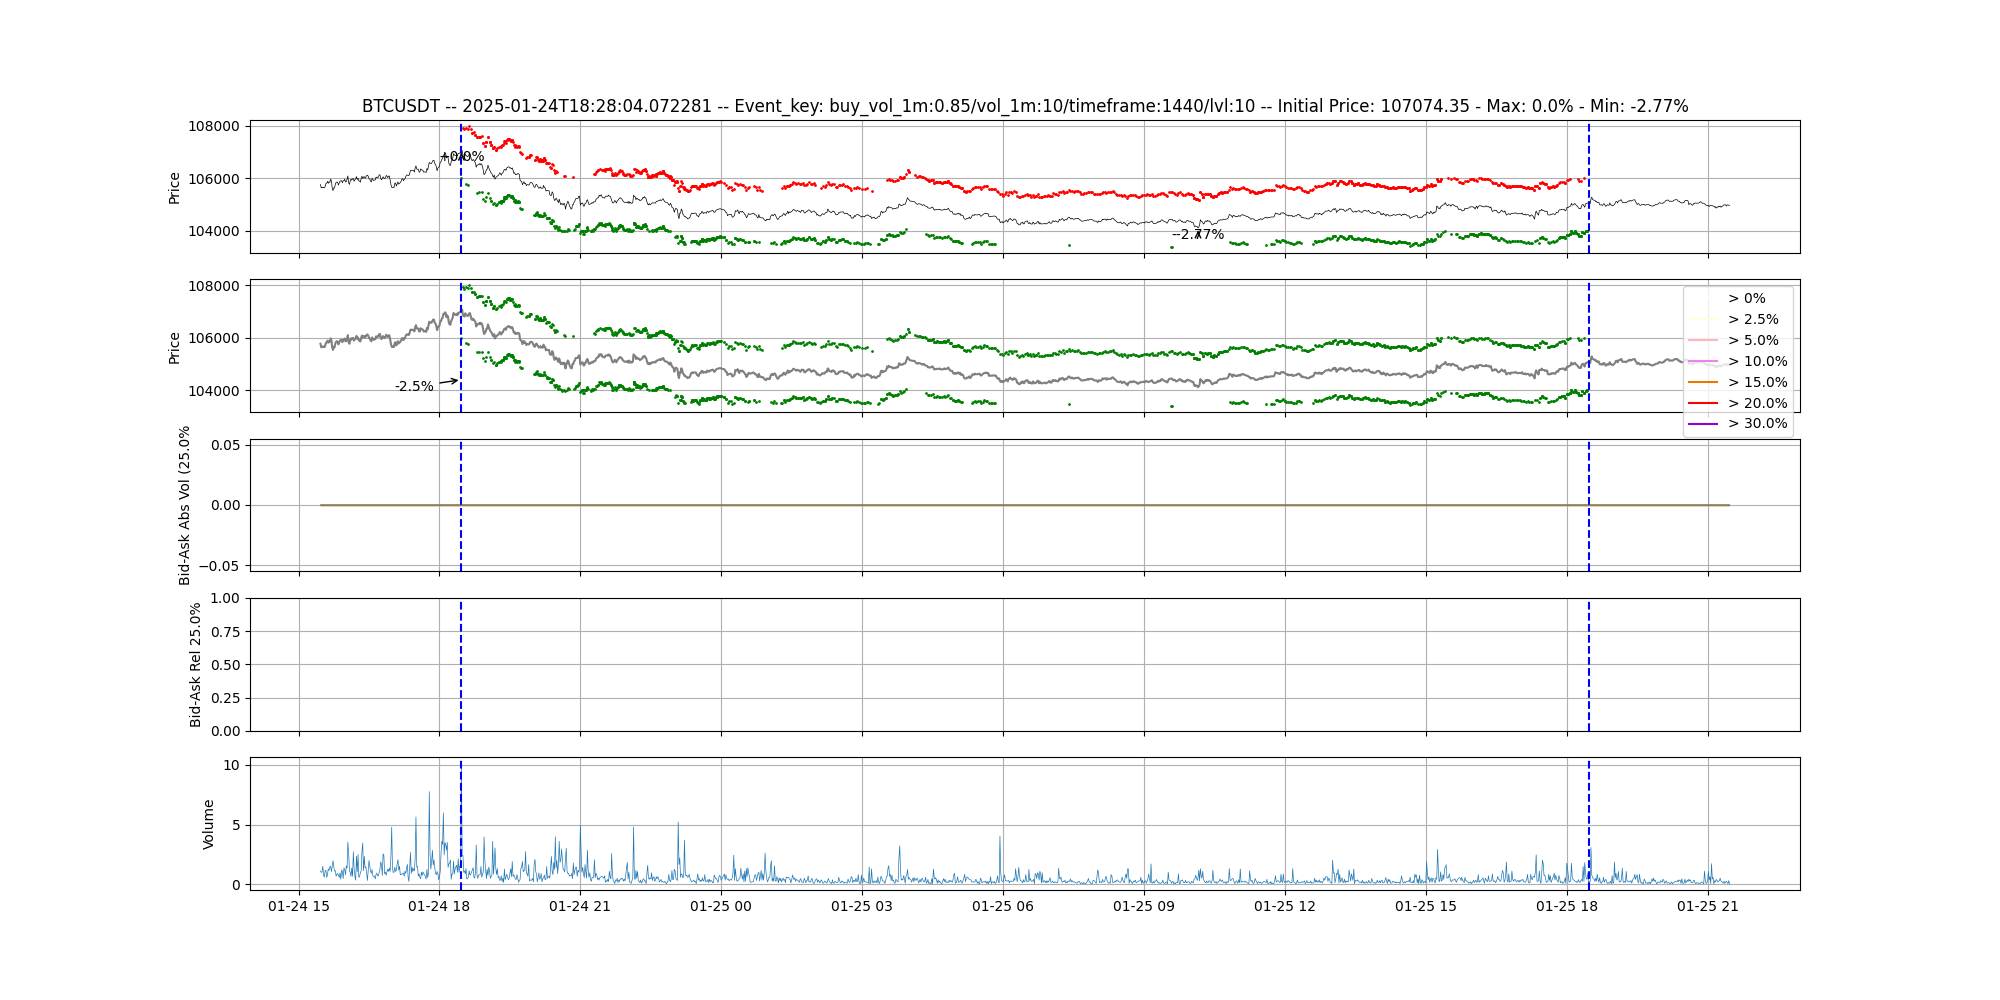

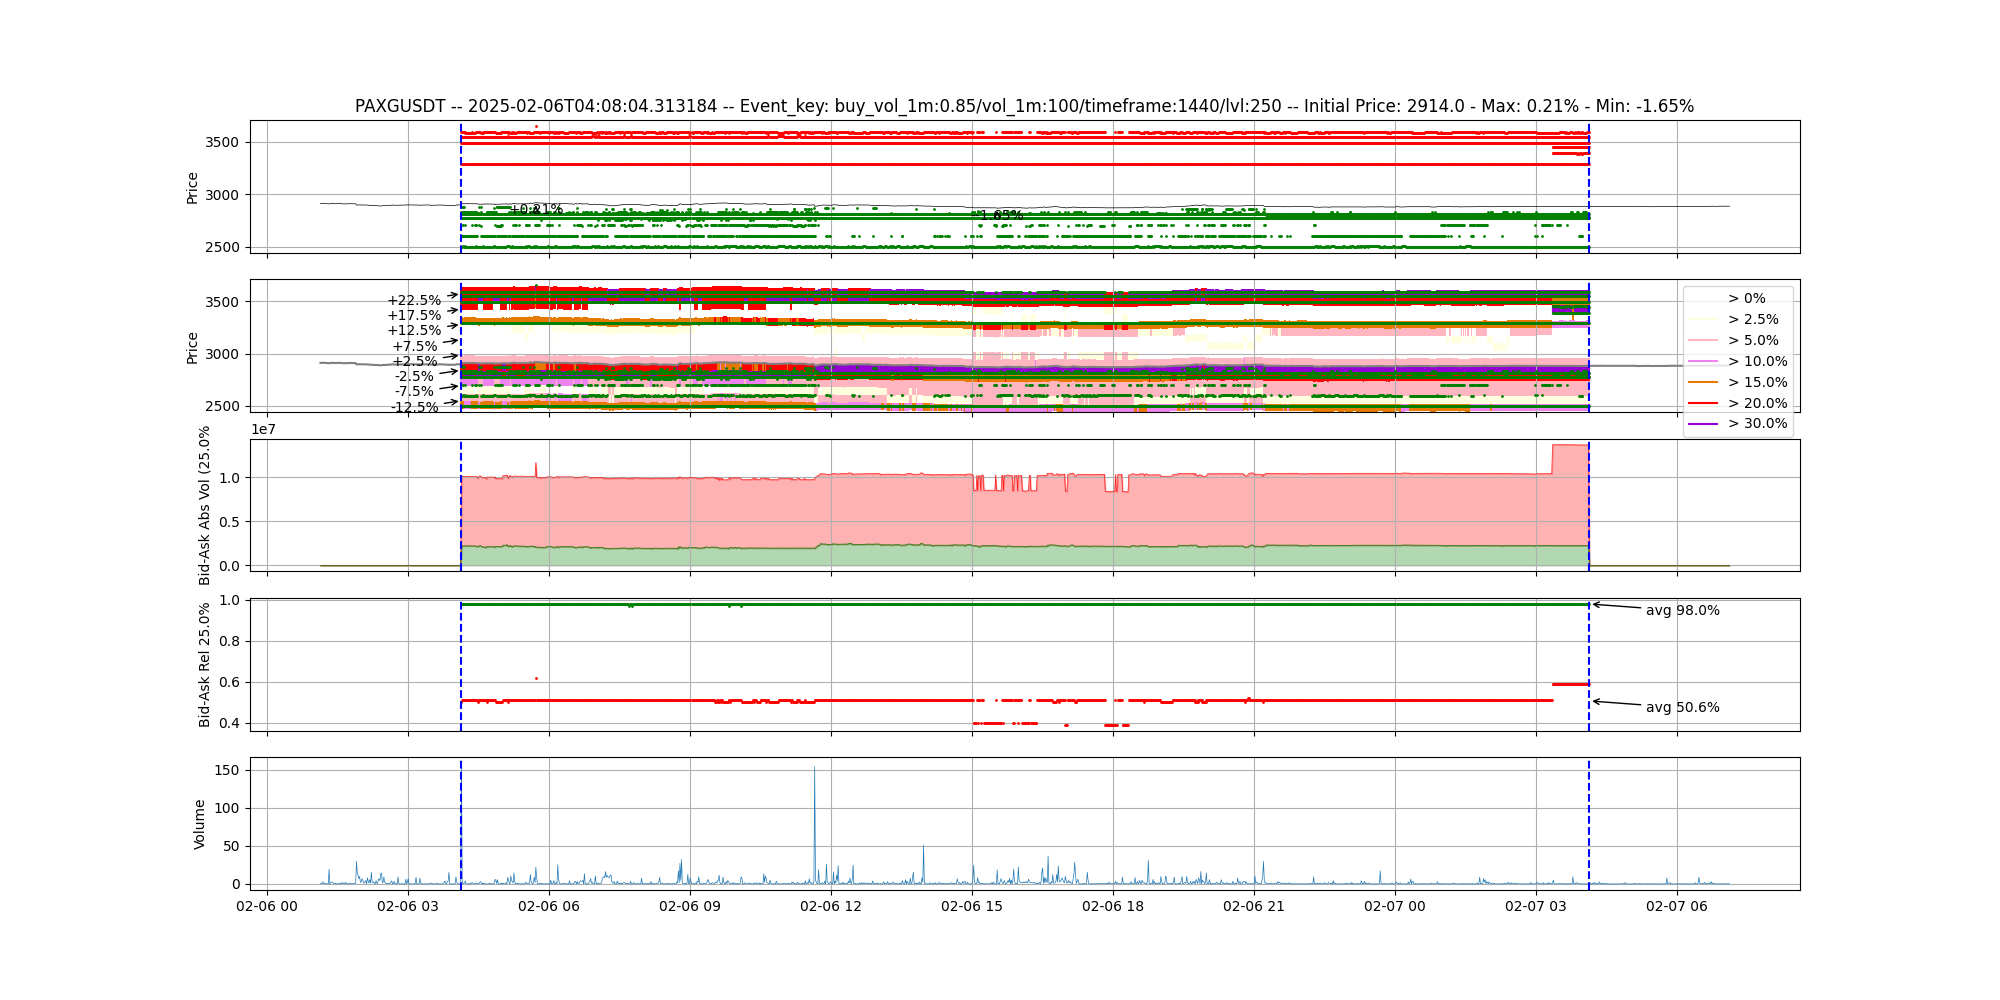

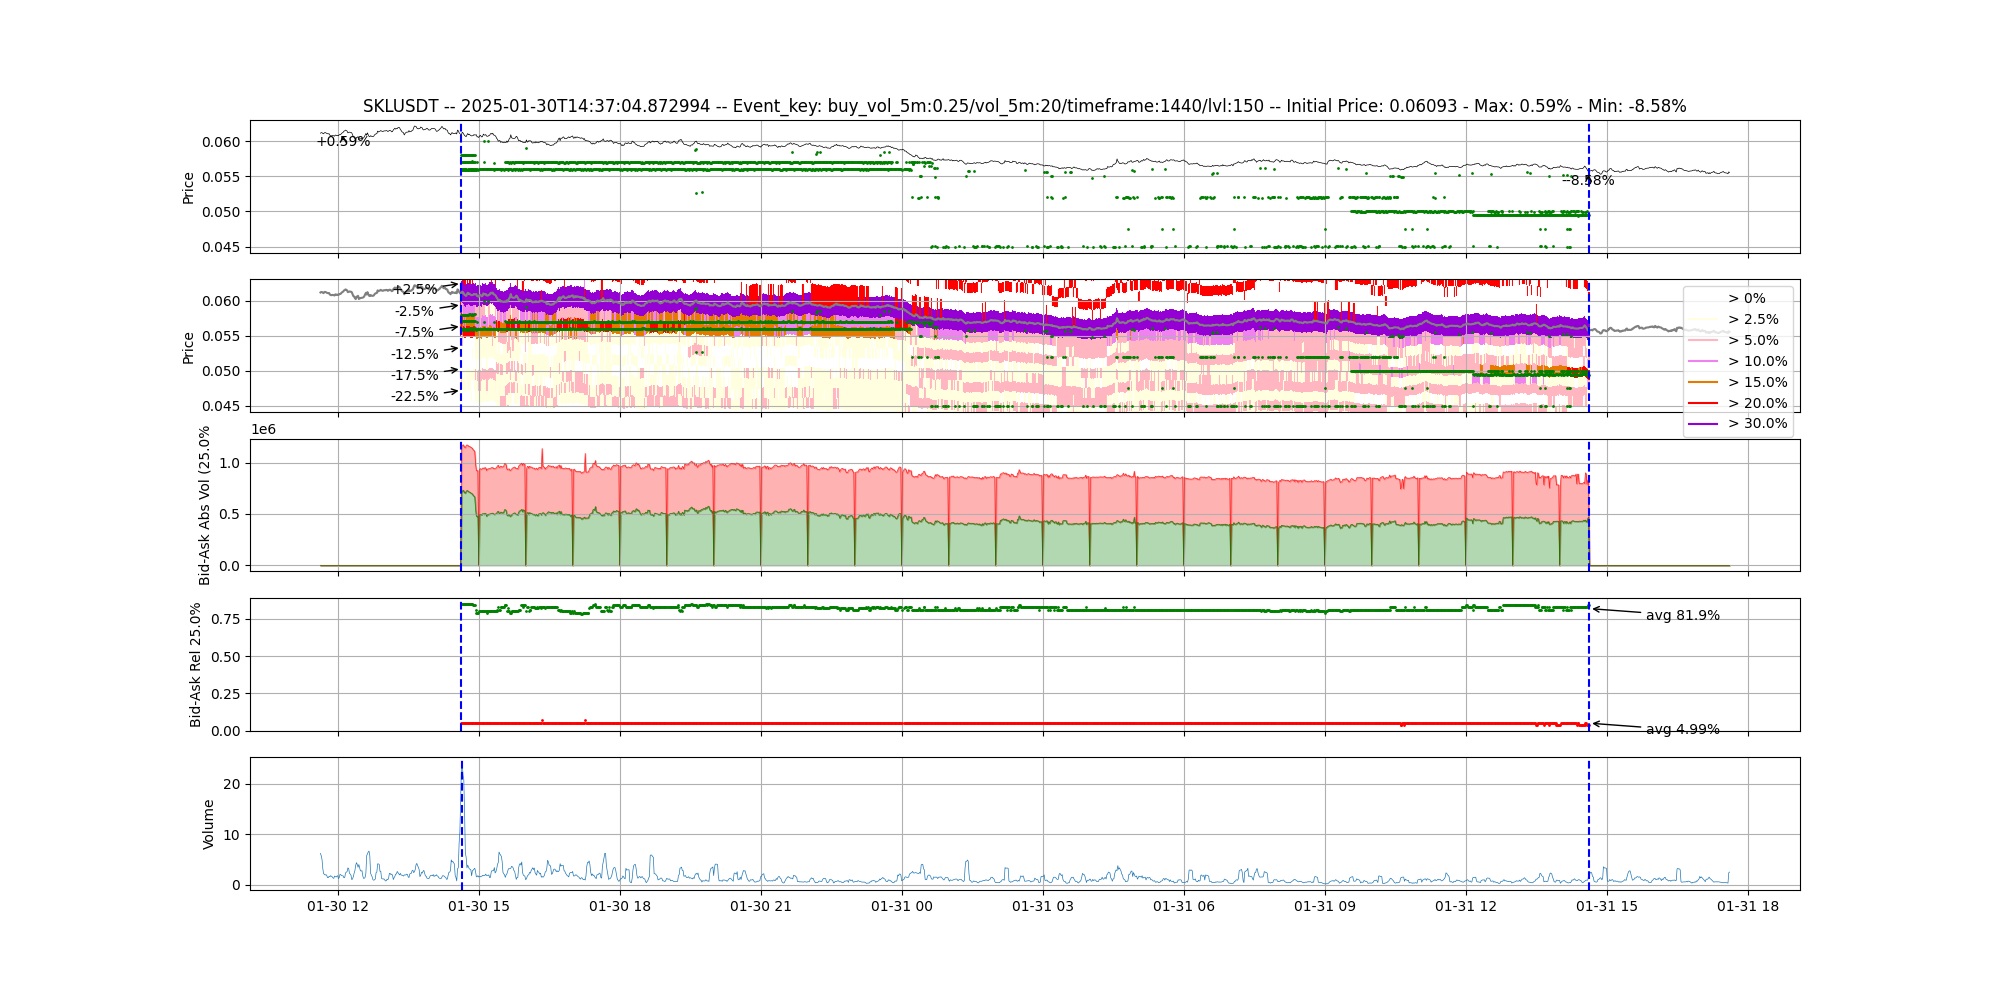

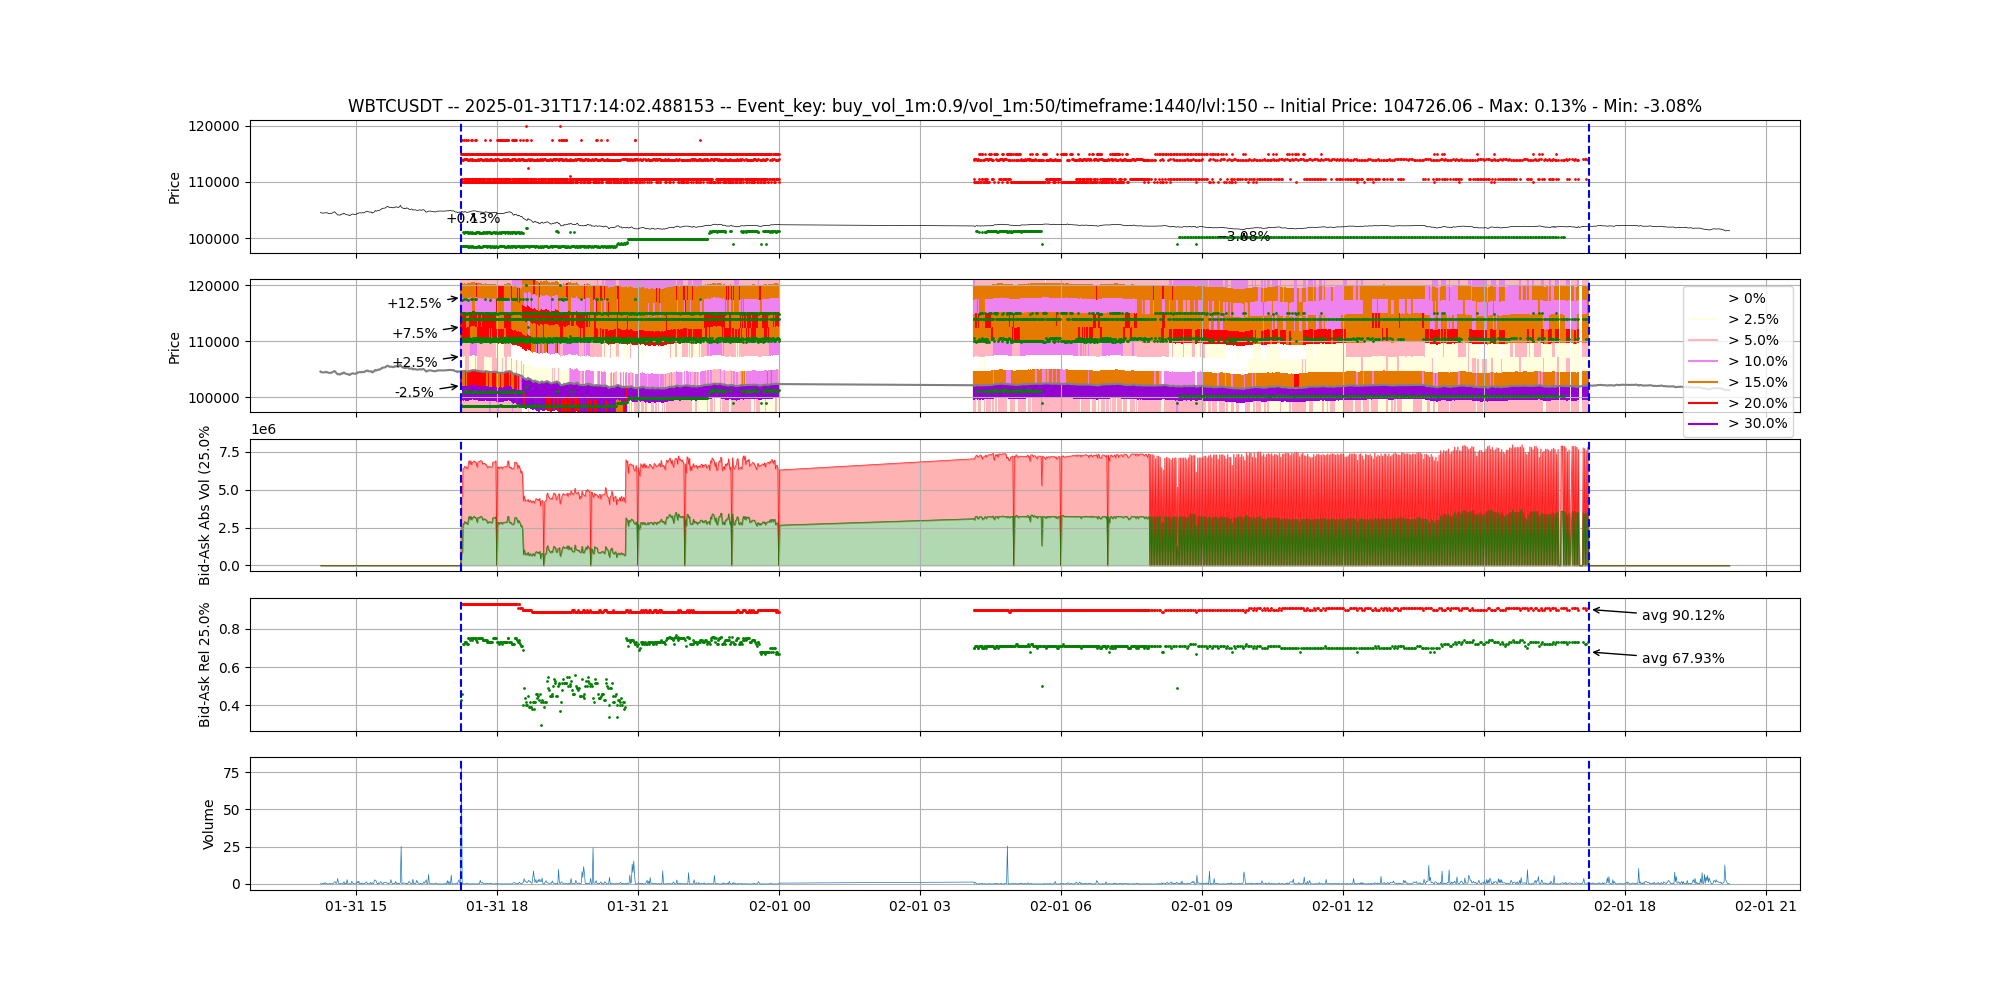

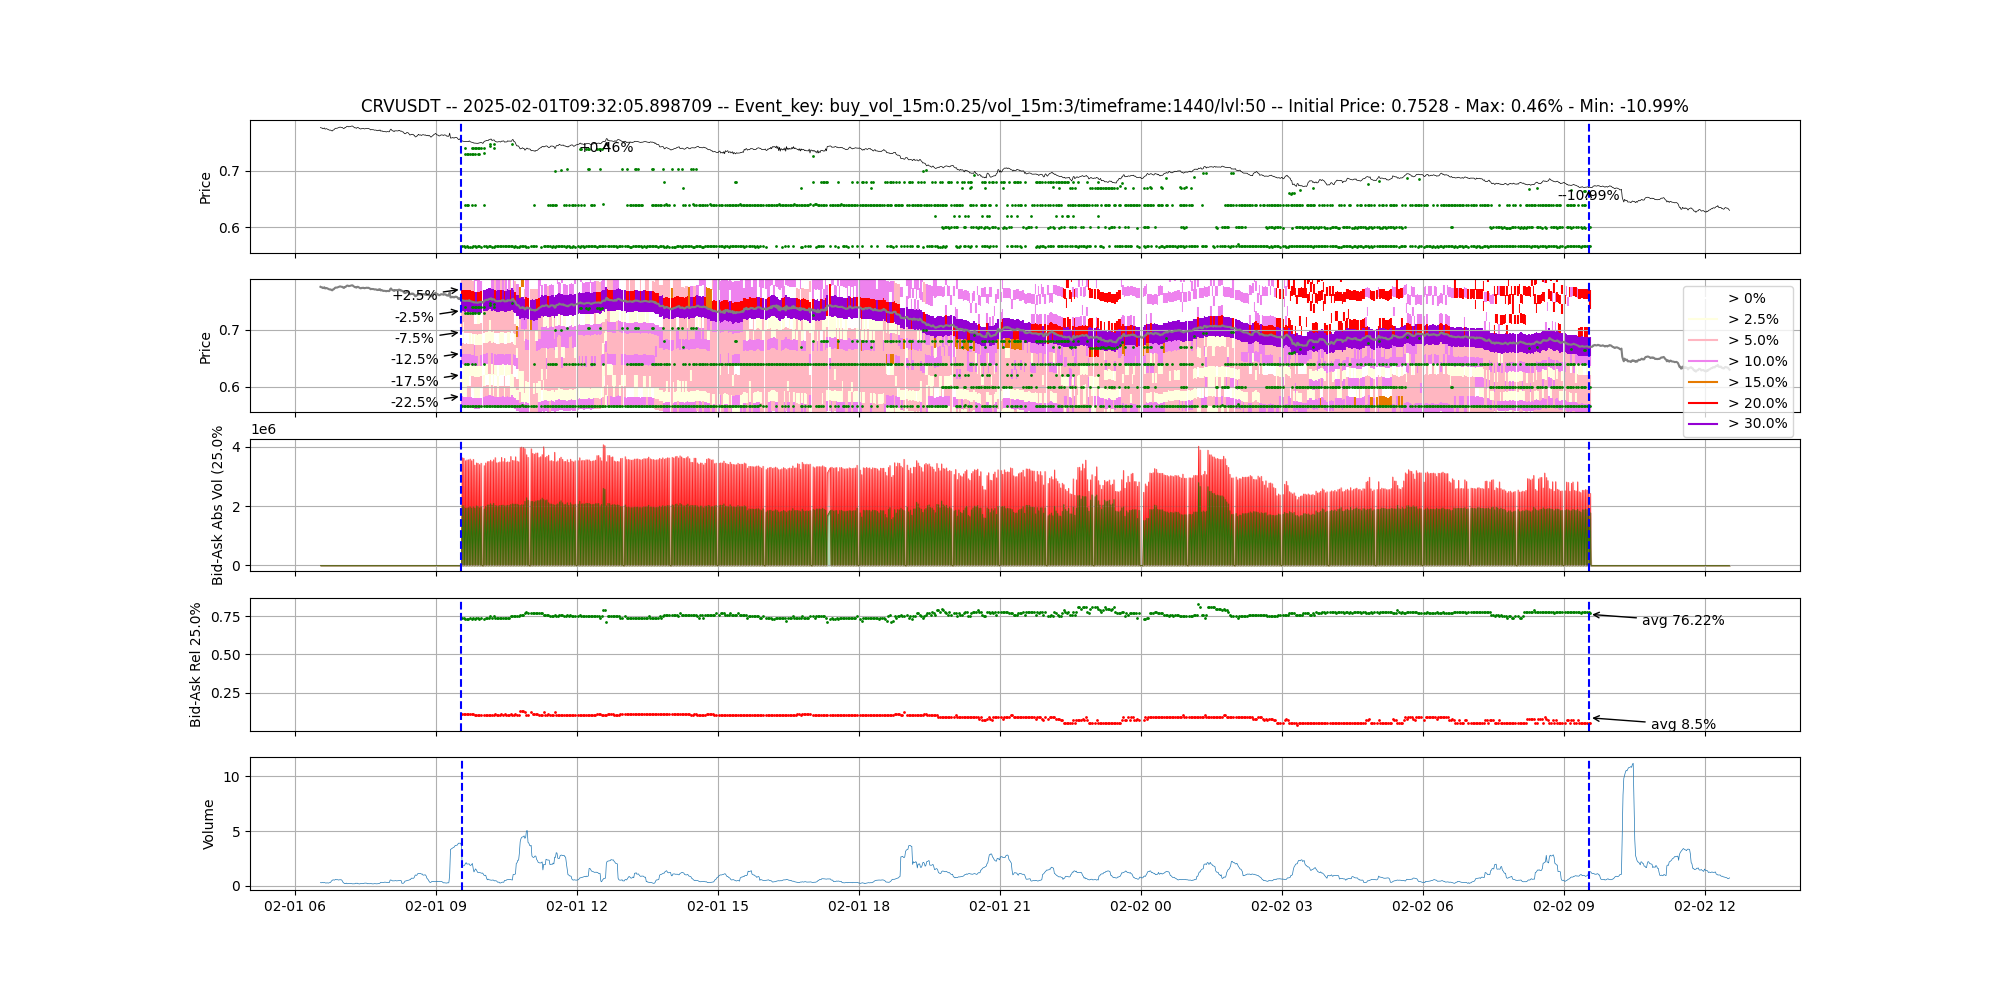

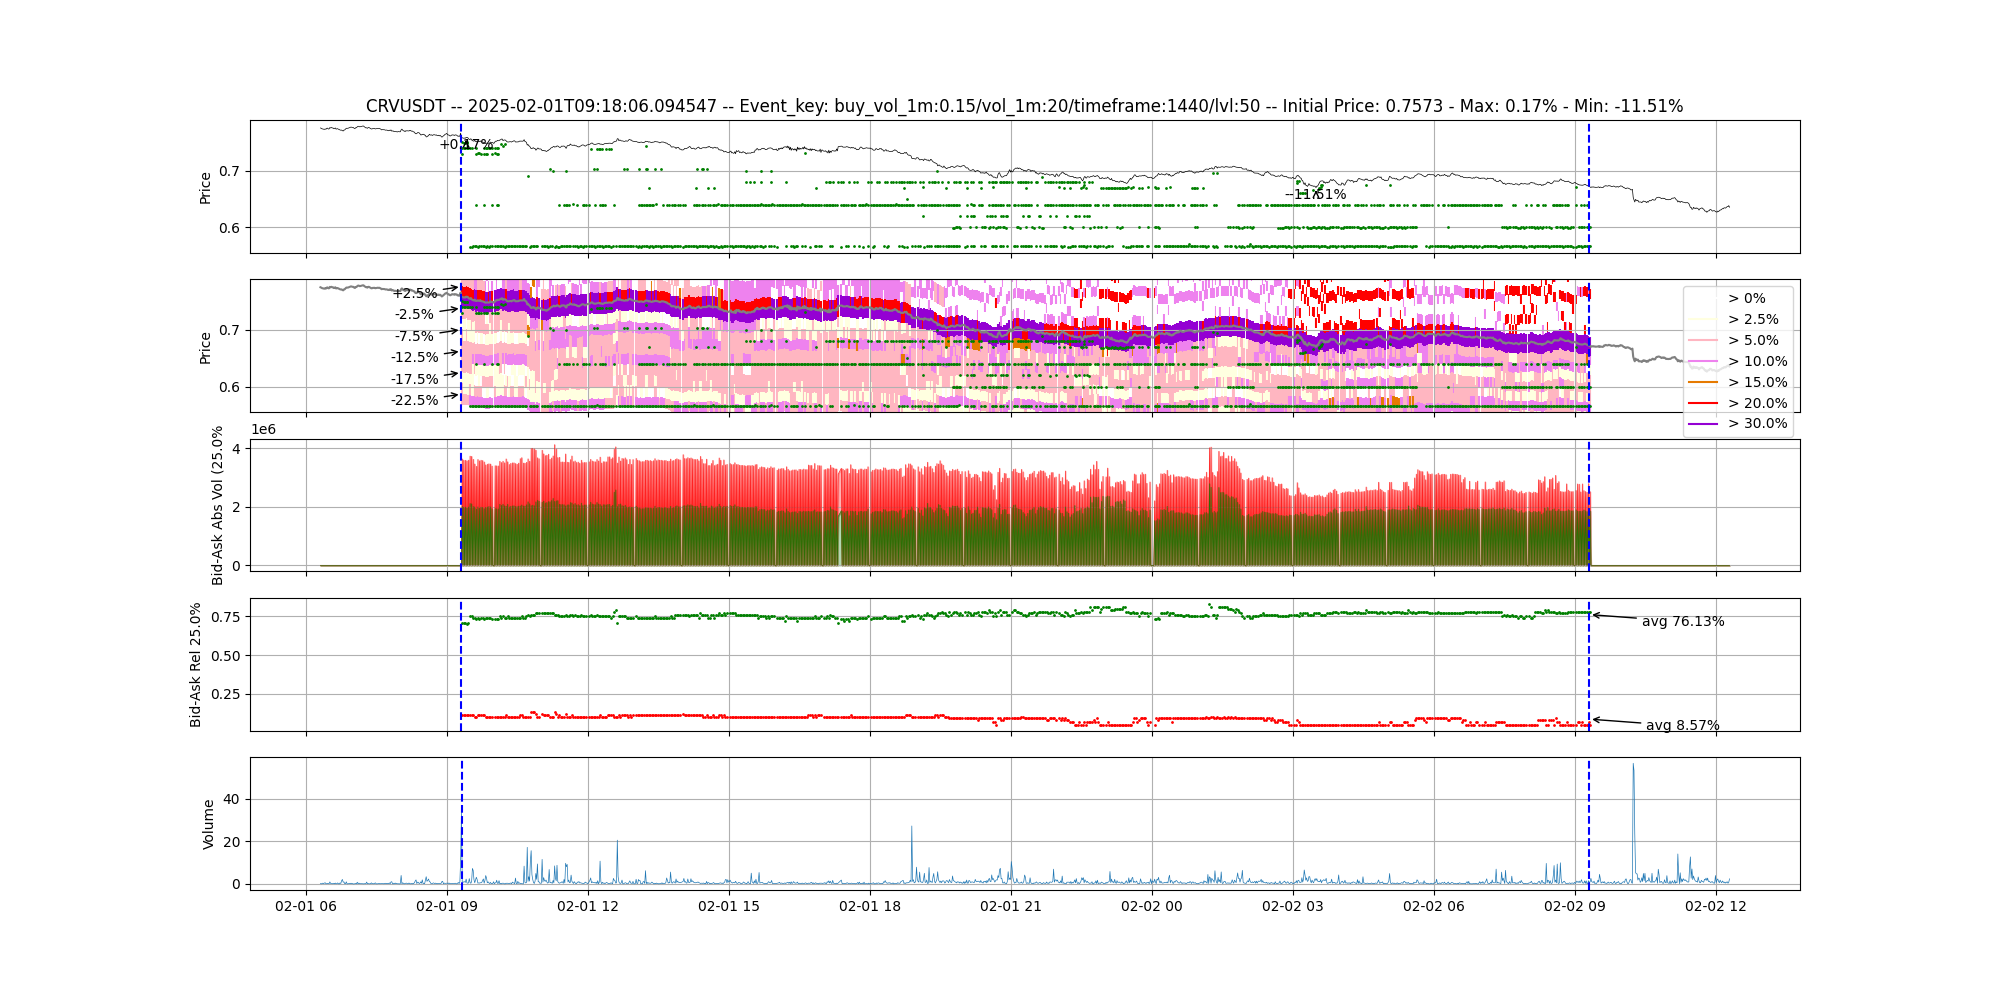

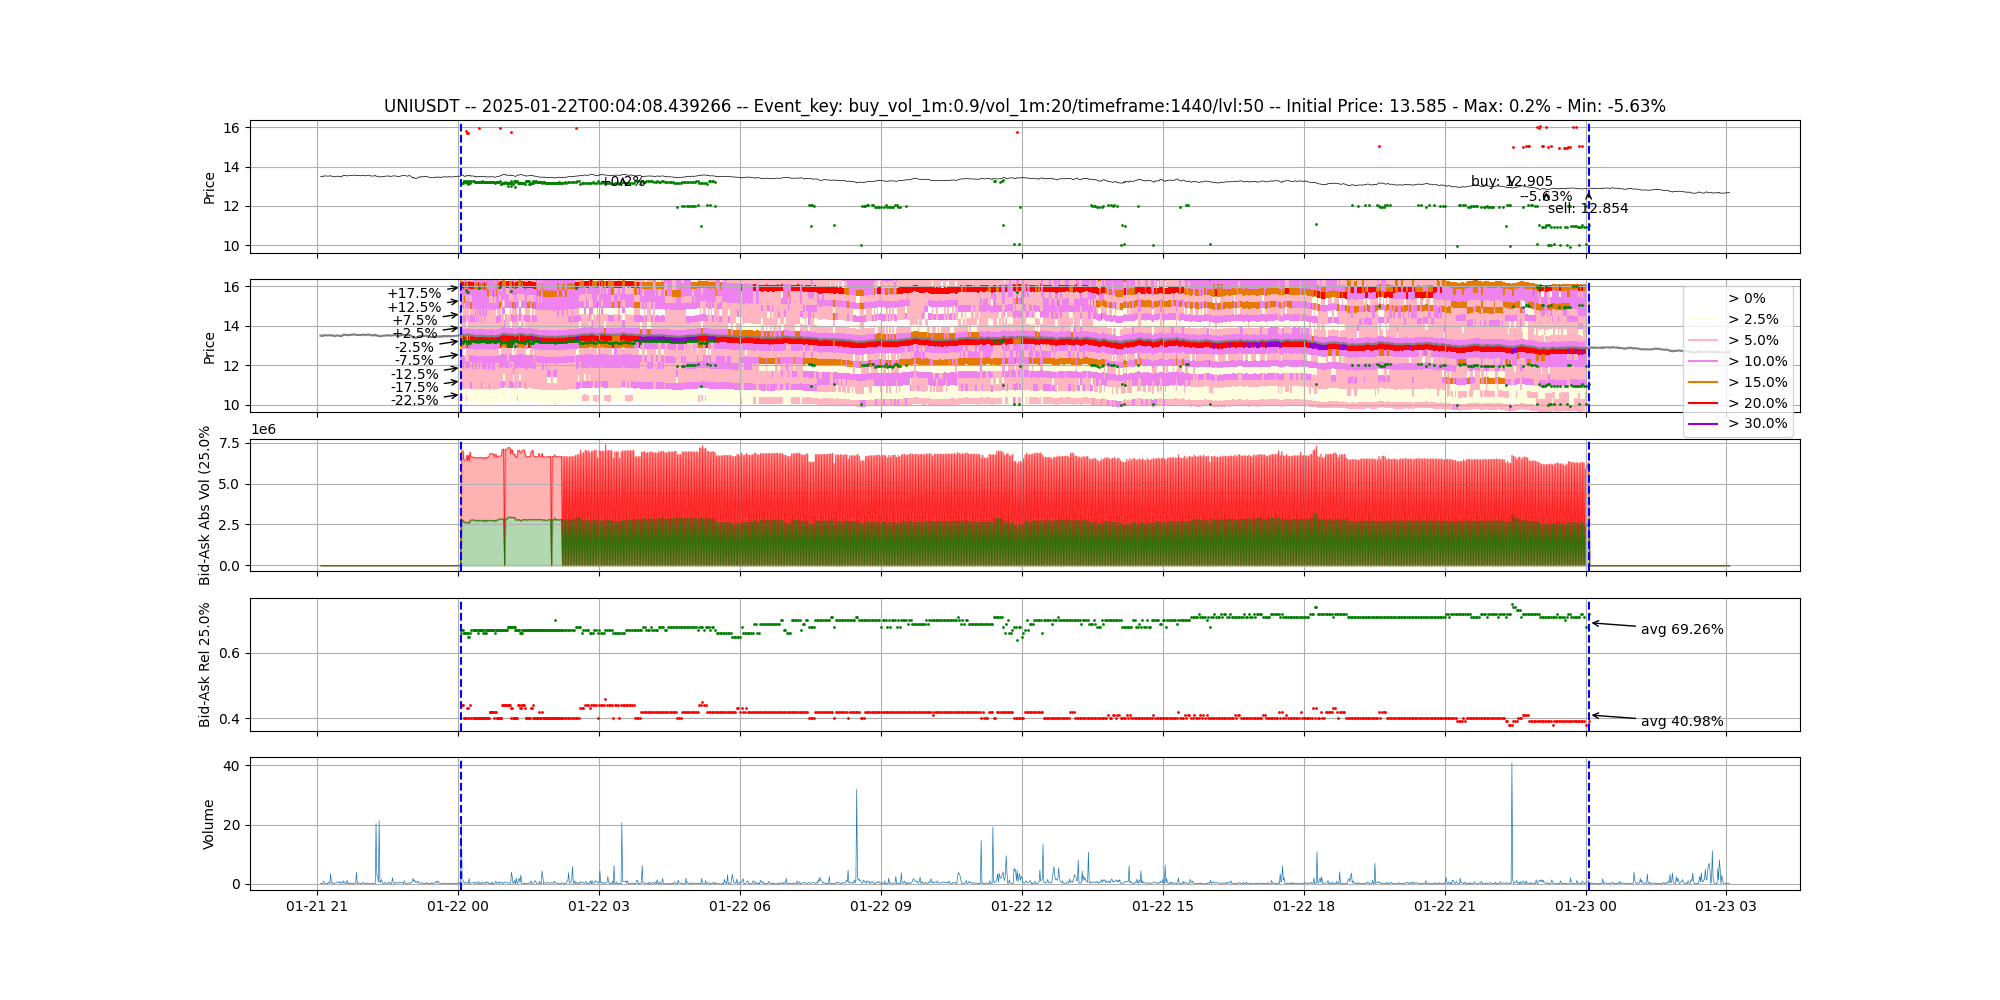

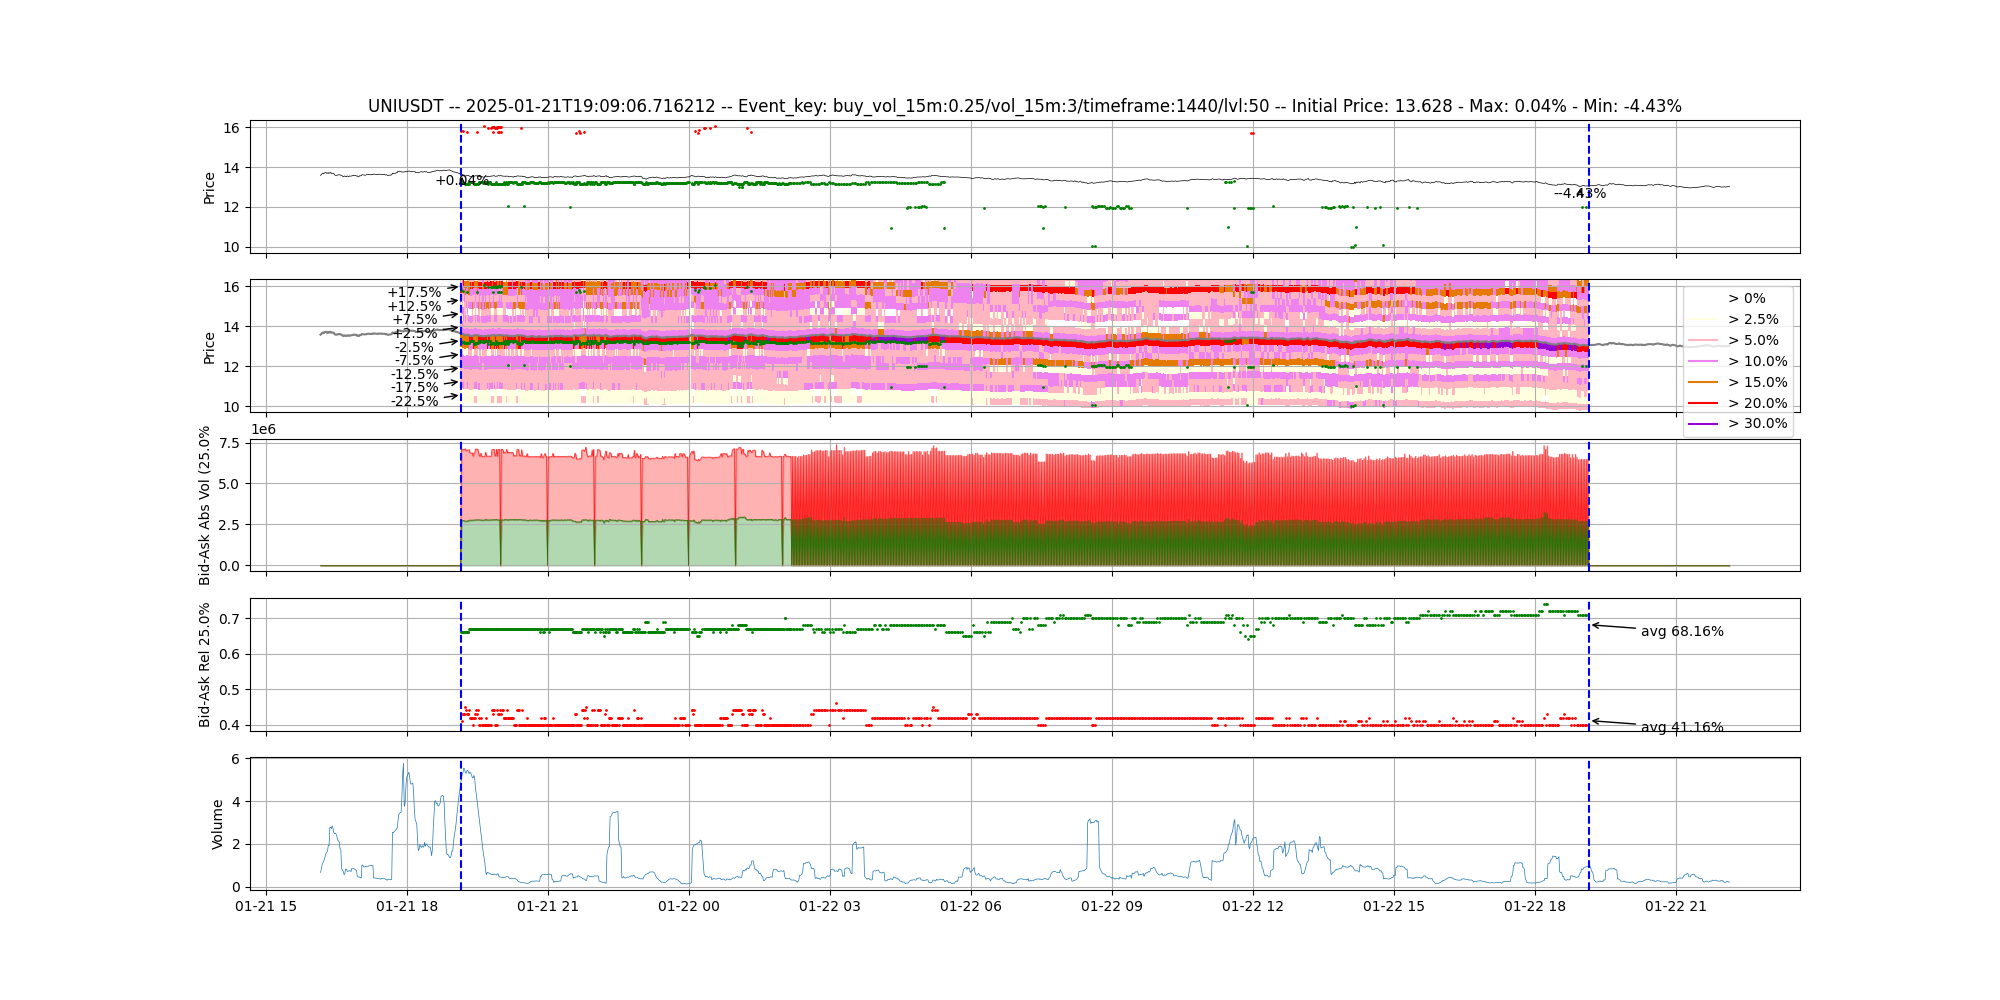

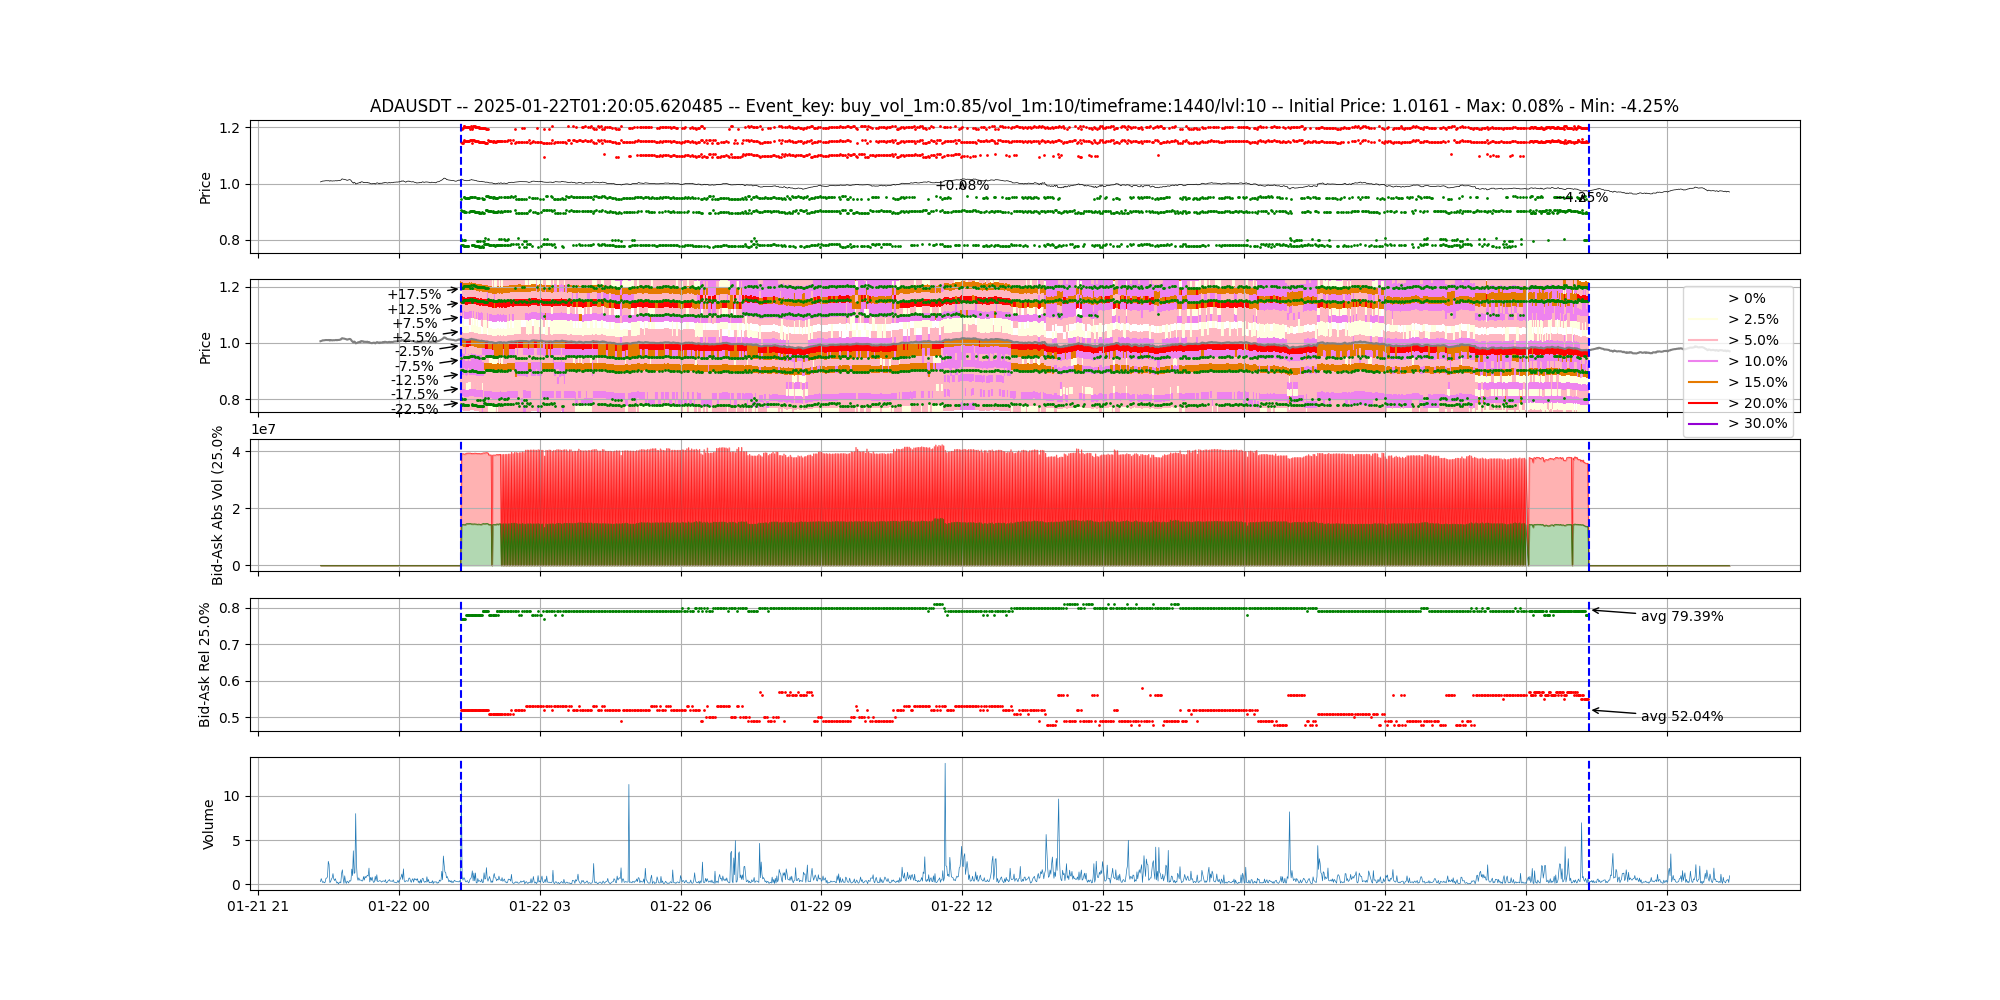

In [1]:
from Helpers import get_plots
from IPython.display import Image, display
left_gain = -1
right_gain = -0.05
buy_events=False
paths_png = get_plots(left_gain, right_gain, buy_events)


In [2]:
from Helpers import get_top_crypto

response, list_datetime = get_top_crypto()
response

svolume standings is up to date, loading then..


{'top_10': [978.9154919268416,
  1000.4284728941459,
  1071.8710721199786,
  1054.139022975565,
  1101.181568904946,
  1101.1134065479537,
  1025.4704133143812,
  1026.7592619292354,
  1051.1427386924406,
  1033.2581385692404,
  1026.7584948736271,
  1018.6115610006483,
  1020.7421681447895,
  982.1900053085421,
  971.3064500939727,
  934.3001070972031,
  953.0080263436411,
  986.5996423248123,
  984.1598337341695,
  926.8628838026373,
  852.5496265246531,
  885.2854594666247,
  841.3013244591812,
  819.8433726950392,
  792.3390748444988,
  787.445658474528,
  807.3130187974089,
  802.4744150718851,
  816.6346516866047,
  813.5429866935841,
  838.1552348337016,
  831.1677393251776,
  877.8845770995786,
  857.6859733007693,
  845.6564643465437,
  832.9974218405135,
  804.5499314047745],
 'top_50': [954.6646067463495,
  996.1703264786461,
  1086.2304942471221,
  1073.013354967049,
  1141.3217240438569,
  1053.6745713338644,
  948.8557889250093,
  948.2530312694203,
  974.3183671520154,
 